In [ ]:
import os

if not os.path.exists('./data'):
    os.makedirs('./data')

!wget -qO ./data/marketing.csv "https://assets.datacamp.com/production/repositories/3879/datasets/bdbbd97f839ef5cafebcc15363201d0e7b08881a/marketing.csv"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Importing data using pandas
marketing = pd.read_csv('./data/marketing.csv',
    parse_dates=['date_served', 'date_subscribed', 'date_canceled'])
marketing.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True


In [2]:
# Summary statistics
marketing.describe(datetime_is_numeric=True)

,date_served,date_subscribed,date_canceled
count,10021,1856,577
mean,2018-01-15 05:02:03.221235456,2018-01-14 02:04:08.275862016,2018-03-03 18:28:04.575389952
min,2018-01-01 00:00:00,2018-01-01 00:00:00,2018-01-05 00:00:00
25%,2018-01-08 00:00:00,2018-01-07 00:00:00,2018-02-07 00:00:00
50%,2018-01-15 00:00:00,2018-01-15 00:00:00,2018-03-04 00:00:00
75%,2018-01-22 00:00:00,2018-01-19 00:00:00,2018-04-01 00:00:00
max,2018-01-31 00:00:00,2018-01-31 00:00:00,2018-05-09 00:00:00


# Data types and data merging

In [3]:
# Missing values & data types
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              10037 non-null  object        
 1   date_served          10021 non-null  datetime64[ns]
 2   marketing_channel    10022 non-null  object        
 3   variant              10037 non-null  object        
 4   converted            10022 non-null  object        
 5   language_displayed   10037 non-null  object        
 6   language_preferred   10037 non-null  object        
 7   age_group            10037 non-null  object        
 8   date_subscribed      1856 non-null   datetime64[ns]
 9   date_canceled        577 non-null    datetime64[ns]
 10  subscribing_channel  1856 non-null   object        
 11  is_retained          1856 non-null   object        
dtypes: datetime64[ns](3), object(9)
memory usage: 941.1+ KB


In [4]:
# Change the data type of a column
marketing['converted'] = marketing['converted'].astype('bool')
# Print a data type of a single column
print(marketing['converted'].dtype)

marketing['is_retained'] = marketing['is_retained'].astype('bool')
print(marketing['is_retained'].dtype)

bool
bool


In [5]:
# Creating new boolean columns
marketing['is_house_ads'] = np.where(
    marketing['marketing_channel']=='House Ads', True, False)
marketing.is_house_ads.head()

0    True
1    True
2    True
3    True
4    True
Name: is_house_ads, dtype: bool

In [6]:
# Mapping values to existing columns
channel_dict = {"House Ads": 1, "Instagram":2,
    "Facebook": 3, "Email": 4, "Push": 5}
marketing['channel_code'] = marketing['marketing_channel']\
    .map(channel_dict)
marketing['channel_code'].head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: channel_code, dtype: float64

In [48]:
# Convert already existing column to datetime column
marketing['date_served'] = pd.to_datetime(marketing['date_served'])
marketing['DoW'] = marketing['date_served']\
    .dt.dayofweek
marketing['DoW'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: DoW, dtype: float64

# Exploratory analysis

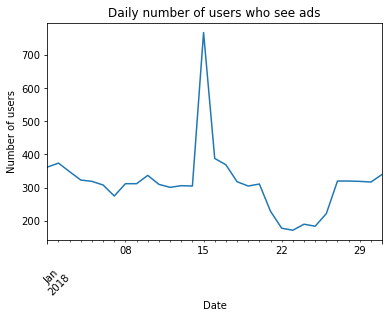

In [8]:
# Aggregate unique users that see ads by date
daily_users = marketing.groupby(['date_served'])\
    ['user_id'].nunique()
# Visualizing
daily_users.plot()
# Annotate
plt.title('Daily number of users who see ads')
plt.xlabel('Date')
plt.ylabel('Number of users')
plt.xticks(rotation=45)
plt.show()

In [9]:
# Calculating conversion rate
converted = marketing[marketing['converted']==True]
subscribers = converted['user_id'].nunique()
total = marketing['user_id'].nunique()
conv_rate = subscribers/total*100
print("Conversion rate:", round(conv_rate, 2), '%')

# Calculating retention rate
retained = converted[converted['is_retained']==True]\
    ['user_id'].nunique()
retention_rate = retained/subscribers*100
print("Retention rate:", round(retention_rate, 2), '%')

Conversion rate: 14.09 %
Retention rate: 67.57 %


In [53]:
# Subset to include only House Ads
house_ads = marketing[marketing['subscribing_channel']=='House Ads']
retained = house_ads[house_ads['is_retained']==True]\
    ['user_id'].nunique()
subscribers = house_ads[house_ads['converted']==True]\
    ['user_id'].nunique()
retention_rate = retained/subscribers*100
print(round(retention_rate, 2), '%')

58.05 %


# Campaign result

subscribing_channel
Email        141
Facebook     152
House Ads    173
Instagram    158
Push          54
Name: user_id, dtype: int64


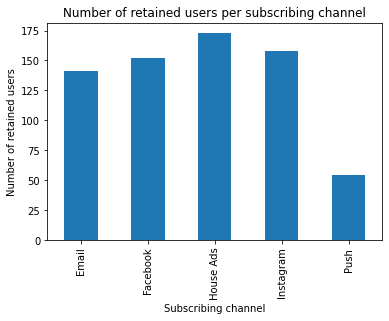

In [16]:
# Group by subscribing_channel and calculate retention
retained = marketing[marketing['is_retained']==True]\
    .groupby(['subscribing_channel'])\
    ['user_id'].nunique()
print(retained)
# Visualizing
retained.plot.bar()
plt.title('Number of retained users per subscribing channel')
plt.xlabel('Subscribing channel')
plt.ylabel('Number of retained users')
plt.show()

subscribing_channel
Email        161
Facebook     221
House Ads    298
Instagram    232
Push          77
Name: user_id, dtype: int64


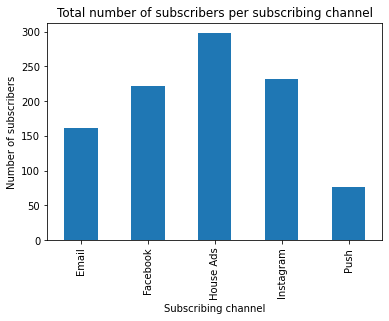

In [17]:
# Group by subscribing_channel and calculate subscribers
subscribers = marketing[marketing['converted']==True]\
    .groupby(['subscribing_channel'])\
    ['user_id'].nunique()
print(subscribers)
# Visualizing
subscribers.plot.bar()
plt.title('Number of subscribers per subscribing channel')
plt.xlabel('Subscribing channel')
plt.ylabel('Number of subscribers')
plt.show()

subscribing_channel
Email        87.577640
Facebook     68.778281
House Ads    58.053691
Instagram    68.103448
Push         70.129870
Name: user_id, dtype: float64


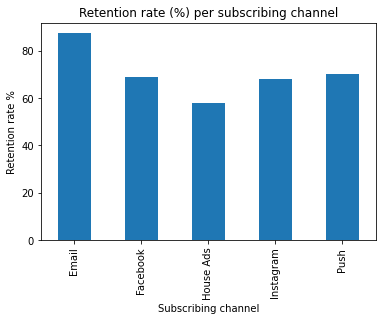

In [19]:
# Calculate the retention rate across the DataFrame
channel_retention_rate = (retained/subscribers)*100
print(channel_retention_rate)
# Visualizing
channel_retention_rate.plot.bar()
plt.title('Retention rate (%) per subscribing channel')
plt.xlabel('Subscribing channel')
plt.ylabel('Retention rate %')
plt.show()

Language conversion rate: language_displayed
Arabic     50.00
English    13.13
German     71.62
Spanish    20.00
Name: user_id, dtype: float64 %


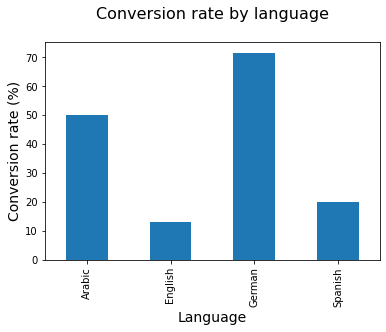

In [27]:
# Comparing language conversion rates
# Group by language_displayed and count unique users
total = marketing.groupby(['language_displayed'])\
    ['user_id'].nunique()
# Group by language_displayed and count unique conversions
subscribers = marketing[marketing['converted']==True]\
    .groupby(['language_displayed'])\
    ['user_id'].nunique()
# Calculate the conversion rate for all languages
language_conversion_rate = subscribers/total*100
print("Language conversion rate:", 
    round(language_conversion_rate, 2), '%')
# Create a bar chart
language_conversion_rate.plot(kind='bar')
# Add a title and x, y-axis labels
plt.title('Conversion rate by language\n', size=16)
plt.xlabel('Language', size=14)
plt.ylabel('Conversion rate (%)', size=14)
# Display the plot
plt.show()

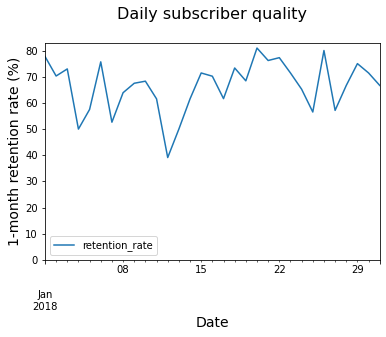

,date_subscribed,retention_rate
0,2018-01-01,77.777778
1,2018-01-02,70.270270
2,2018-01-03,72.972973
3,2018-01-04,50.000000
4,2018-01-05,57.500000


In [40]:
# Group by date_subscribed and count unique users
total = marketing.groupby(['date_subscribed'])\
    ['user_id'].nunique()
# Group by date_subscribed and sum conversions
retained = marketing[marketing['is_retained']==True]\
    .groupby(['date_subscribed'])\
    ['user_id'].nunique()
# Calculate subscriber quality across dates
daily_retention_rate = retained/total*100
# Reset index to turn the Series into a DataFrame
daily_retention_rate = pd.DataFrame(daily_retention_rate.reset_index())
# Rename columns
daily_retention_rate.columns = ['date_subscribed', 'retention_rate']
# Create a line chart using the daily_retention DataFrame
daily_retention_rate.plot('date_subscribed', 'retention_rate')
# Add a title and x, y-axis labels
plt.title('Daily subscriber quality\n', size=16)
plt.ylabel('1-month retention rate (%)', size=14)
plt.xlabel('Date', size=14)
# Set the y-axis to begin at 0
plt.ylim(0)
# Display the plot
plt.show()
daily_retention_rate.head()

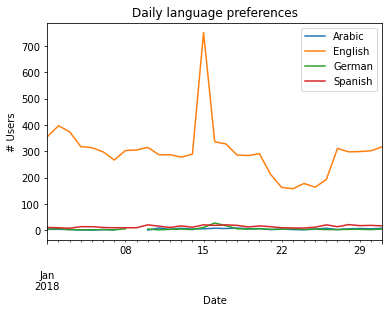

language_preferred,Arabic,English,German,Spanish
date_served,,,,
2018-01-01,4.0,355.0,5.0,11.0
2018-01-02,4.0,397.0,6.0,10.0
2018-01-03,3.0,374.0,3.0,8.0
2018-01-04,2.0,318.0,2.0,14.0
2018-01-05,1.0,314.0,2.0,14.0


In [39]:
# Grouping by multiple columns
language = marketing.groupby(['date_served', 'language_preferred'])\
    ['user_id'].count()
# Unstacking after groupby
language = pd.DataFrame(language.unstack(level=1))
# Plotting preferred language over time
language.plot()
plt.title('Daily language preferences')
plt.xlabel('Date')
plt.ylabel('# Users')
plt.legend(loc='upper right', labels=language.columns.values)
plt.show()
language.head()

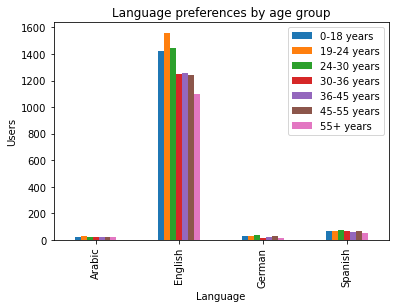

age_group,0-18 years,19-24 years,24-30 years,30-36 years,36-45 years,45-55 years,55+ years
language_preferred,,,,,,,
Arabic,19,26,19,19,19,21,22
English,1421,1560,1442,1251,1260,1240,1101
German,31,29,35,16,19,25,12
Spanish,68,67,72,69,55,67,52


In [38]:
# Create DataFrame grouped by age and language preference
language_age = marketing.groupby(['language_preferred', 'age_group'])\
    ['user_id'].count()
language_age = pd.DataFrame(language_age.unstack(level=1))
# Plotting language preferences by age group
language_age.plot(kind='bar')
plt.title('Language preferences by age group')
plt.xlabel('Language')
plt.ylabel('Users')
plt.legend(loc='upper right', labels=language_age.columns.values)
plt.show()
language_age.head()

In [56]:
# Building a conversion function
def conversion_rate(dataframe, column_names):
    # Group by user_id
    total = dataframe['user_id'].nunique()
    # Group by column_names and calculate conversion
    converted = dataframe[dataframe['converted']==True]\
        .groupby(column_names)['user_id'].nunique()
    conversion_rate = converted/total*100
    return conversion_rate

In [41]:
# Building a retention function
def retention_rate(dataframe, column_names):
    # Group by column_names and calculate retention
    retained = dataframe[dataframe['is_retained']==True]\
        .groupby(column_names)['user_id'].nunique()
    # Group by column_names and calculate conversion
    converted = dataframe[dataframe['converted']==True]\
        .groupby(column_names)['user_id'].nunique()
    retention_rate = retained/converted
    return retention_rate

In [45]:
# Plotting function
def plotting(dataframe):
    for column in dataframe:
        plt.plot(dataframe.index, dataframe[column])
        plt.title('Daily ' + column + ' retention rate\n', size=16)
        plt.ylabel('Retention rate (%)', size=14)
        plt.xlabel('Date', size=12)
        plt.xticks(rotation=45)
        plt.show()

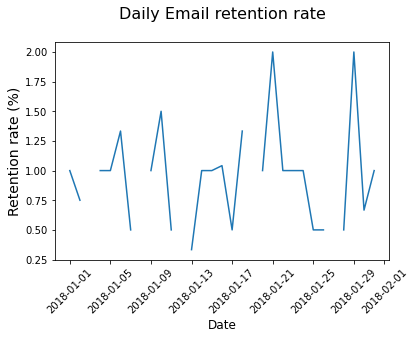

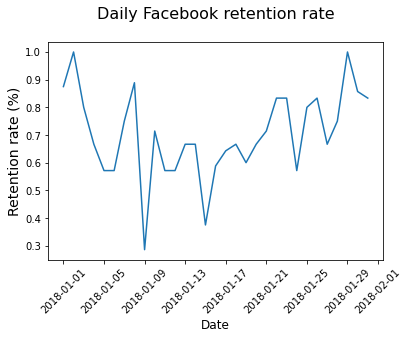

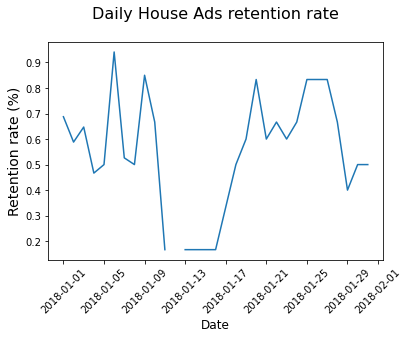

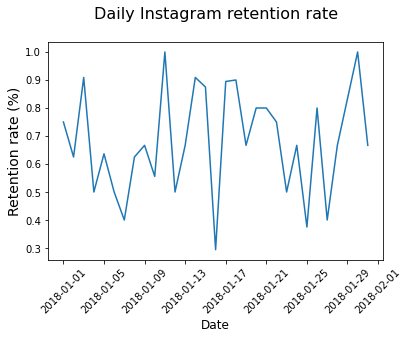

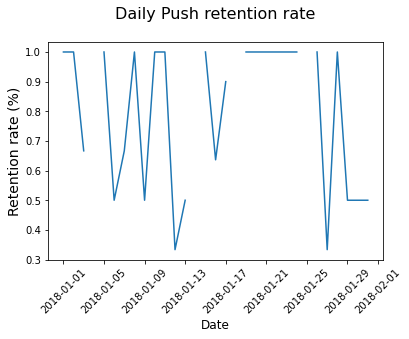

subscribing_channel,Email,Facebook,House Ads,Instagram,Push
date_subscribed,,,,,
2018-01-01,1.00,0.875000,0.687500,0.750000,1.000000
2018-01-02,0.75,1.000000,0.588235,0.625000,1.000000
2018-01-03,NaN,0.800000,0.647059,0.909091,0.666667
2018-01-04,1.00,0.666667,0.466667,0.500000,NaN
2018-01-05,1.00,0.571429,0.500000,0.636364,1.000000


In [46]:
# Retention rate by channel
daily_retention = retention_rate(marketing, 
    ['date_subscribed', 'subscribing_channel'])
daily_retention = pd.DataFrame(daily_retention.unstack(level=1))
plotting(daily_retention)
daily_retention.head()

# Inconsistencies

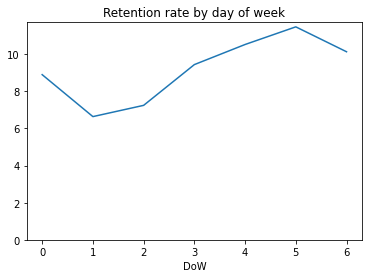

In [50]:
# Day of week trends
DoW_retention = retention_rate(marketing, ['DoW'])
# Plot retention by day of week
DoW_retention.plot()
plt.title('Retention rate by day of week')
plt.ylim(0)
plt.show()

In [57]:
# Calculate pre-error conversion rate
# Bug arose sometime around '2018-01-11'
house_ads_no_bug = house_ads[house_ads['date_served'] < '2018-01-11']
lang_conv = conversion_rate(house_ads_no_bug, ['language_displayed'])
lang_conv

language_displayed
Arabic      3.431373
English    69.607843
German      5.882353
Spanish     8.333333
Name: user_id, dtype: float64